In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings


In [50]:
df = pd.read_csv('../Covid Data.csv')
df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [52]:
df.isnull().sum()

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64

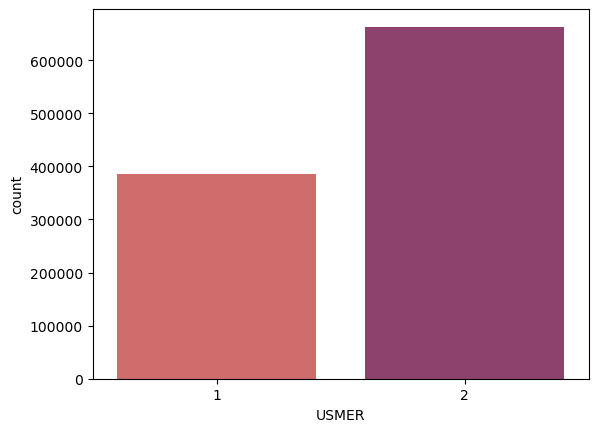

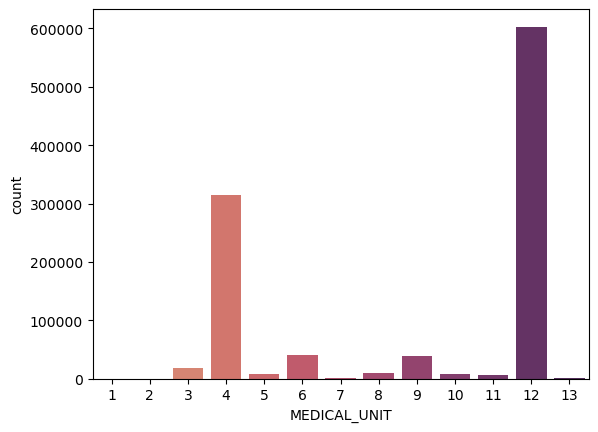

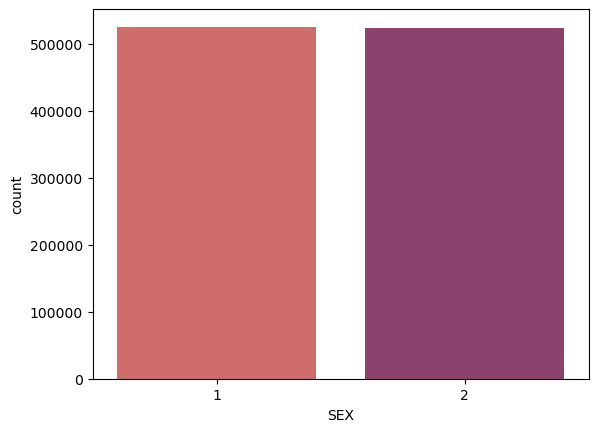

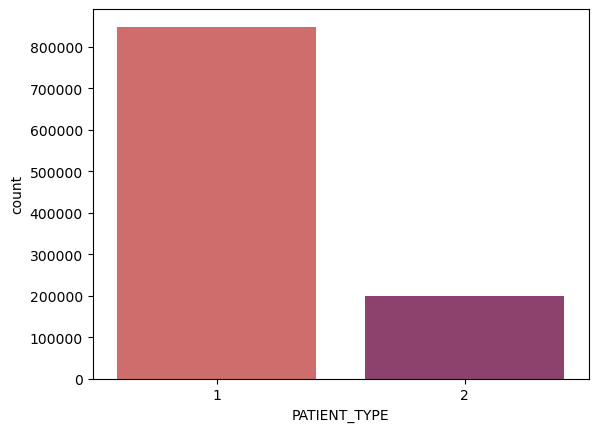

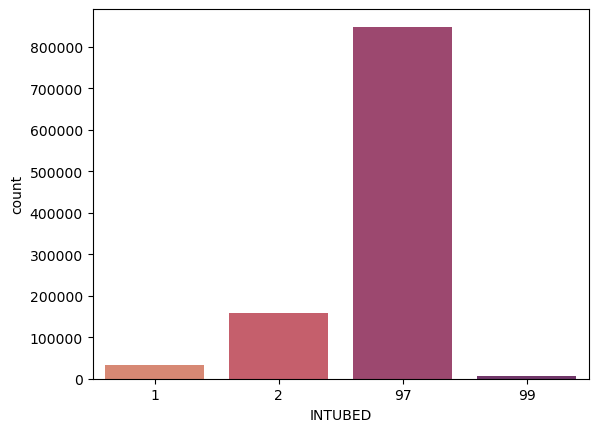

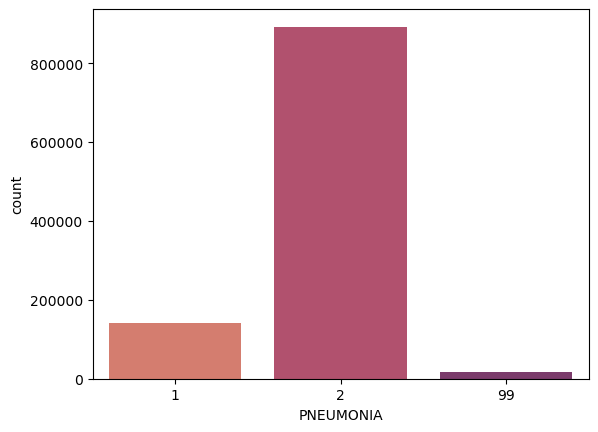

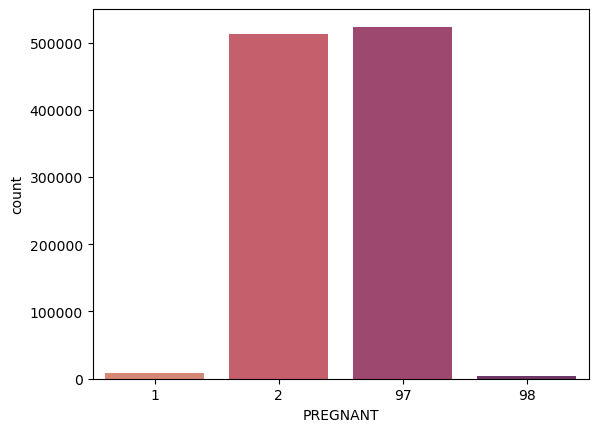

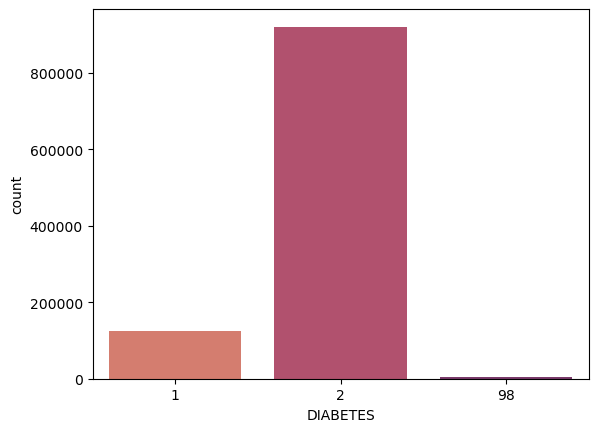

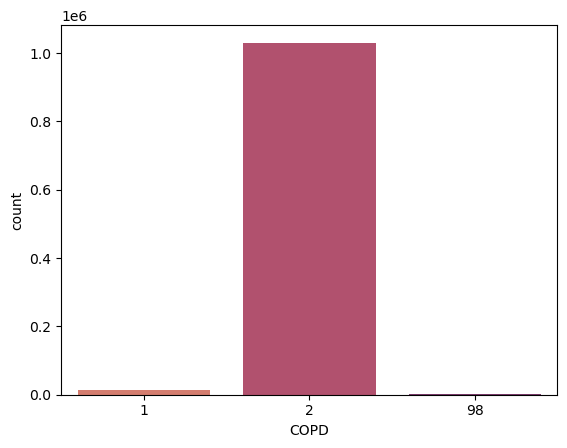

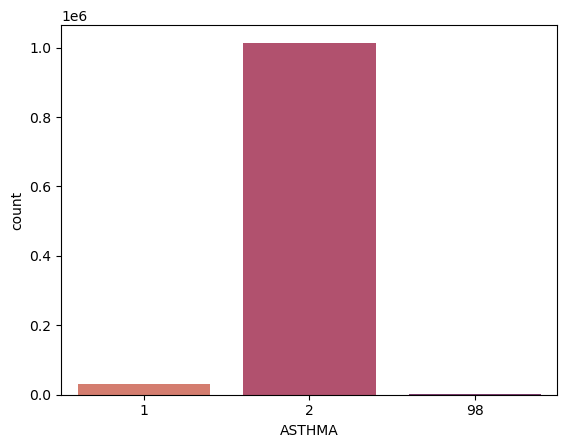

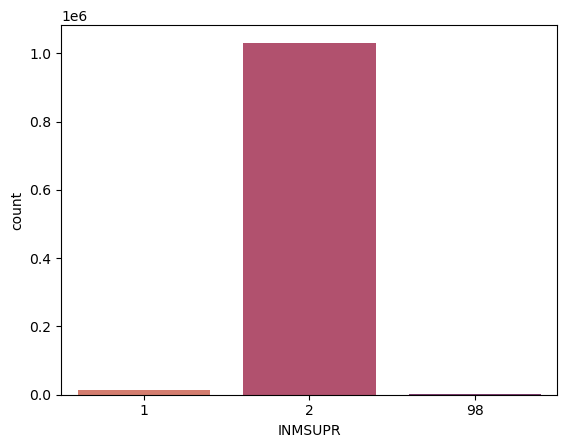

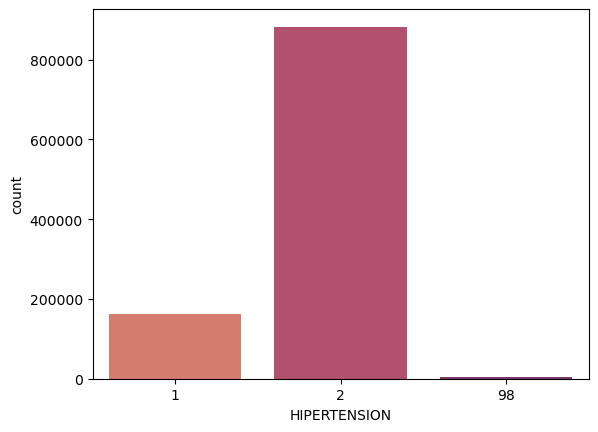

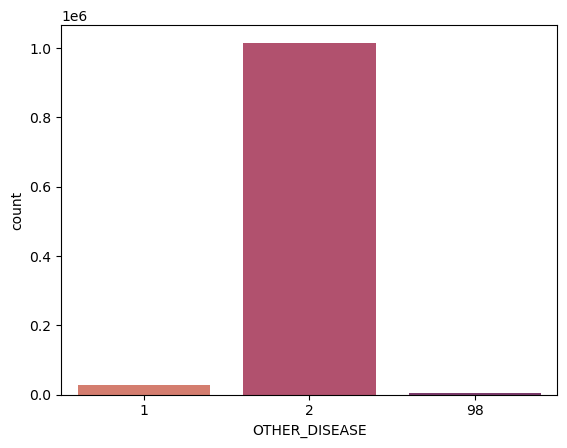

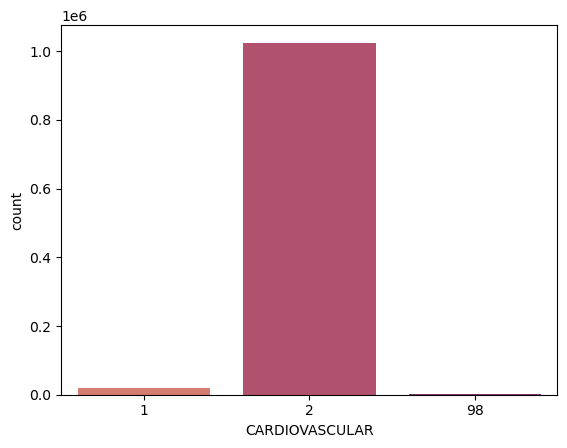

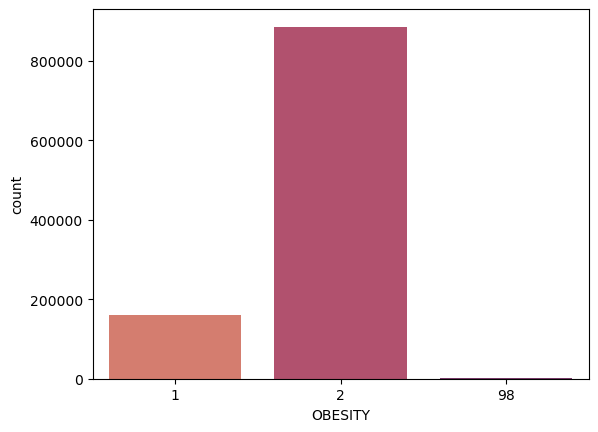

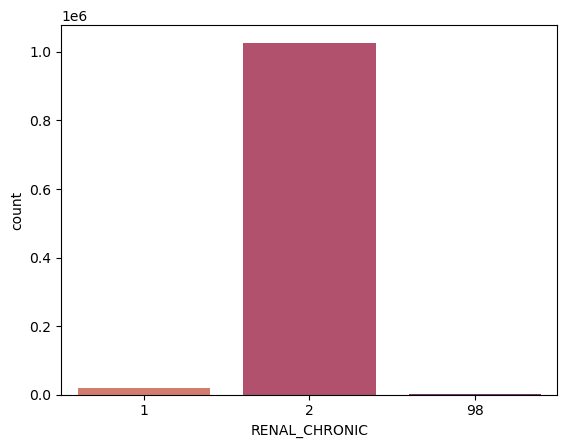

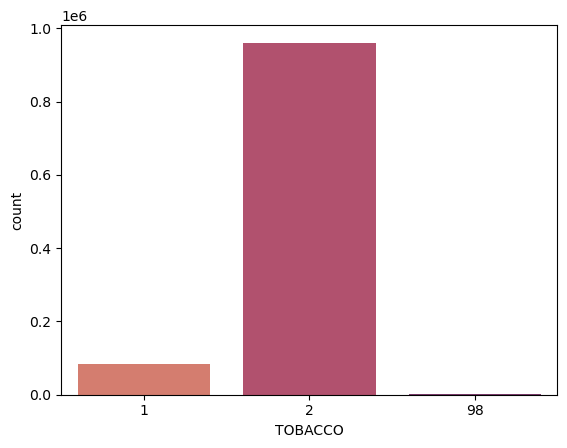

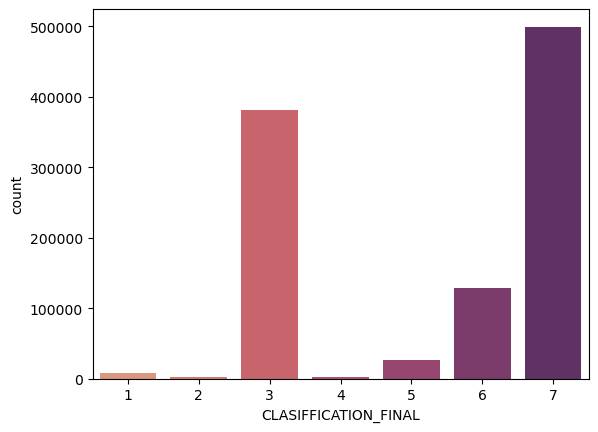

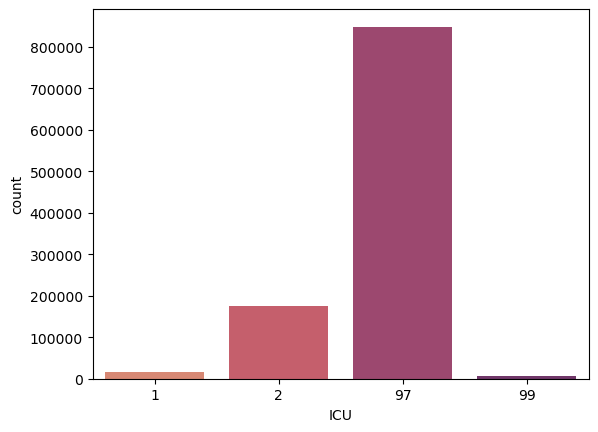

In [53]:
for i in df.loc[:, ~df.columns.isin(["DATE_DIED", "AGE"])]:
    f = sns.countplot(x=df[i],palette='flare');
    plt.show()

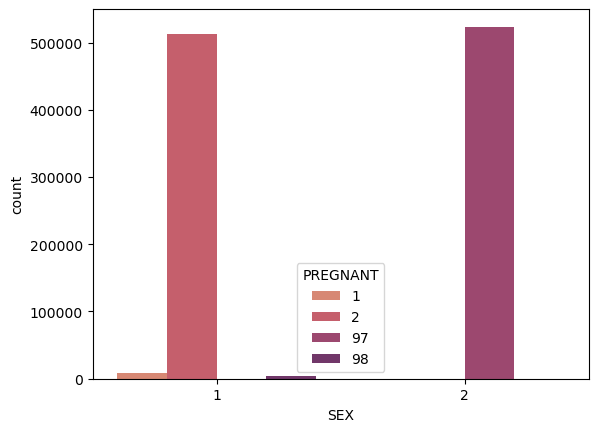

In [54]:
df2=df[['SEX','PREGNANT']]
df2.head()
df2.loc[(df2['SEX']==2) & (df2['PREGNANT']==97)]
plt.figure()
ax=sns.countplot(x=df2["SEX"],hue='PREGNANT',data=df2,palette='flare')





We can see that all missing values for PREGNANT column that has been replaced with 97are for males who can not be pregnant. So we will replace 97 with 2.


In [55]:
df.PREGNANT = df.PREGNANT.replace(97, 2)


In [56]:
df['DEATH'] = [2 if row=='9999-99-99' else 1 for row in df['DATE_DIED']]



In [57]:
df['DEATH'].value_counts()

2    971633
1     76942
Name: DEATH, dtype: int64

In [58]:
for col in df.columns:
    print(col)
    print(df.loc[df[col] == 97, col].count())
    print(df.loc[df[col] == 98, col].count())
    print(df.loc[df[col] == 99, col].count())
    print()

USMER
0
0
0

MEDICAL_UNIT
0
0
0

SEX
0
0
0

PATIENT_TYPE
0
0
0

DATE_DIED
0
0
0

INTUBED
848544
0
7325

PNEUMONIA
0
0
16003

AGE
135
124
86

PREGNANT
0
3754
0

DIABETES
0
3338
0

COPD
0
3003
0

ASTHMA
0
2979
0

INMSUPR
0
3404
0

HIPERTENSION
0
3104
0

OTHER_DISEASE
0
5045
0

CARDIOVASCULAR
0
3076
0

OBESITY
0
3032
0

RENAL_CHRONIC
0
3006
0

TOBACCO
0
3220
0

CLASIFFICATION_FINAL
0
0
0

ICU
848544
0
7488

DEATH
0
0
0



In [59]:
df['INTUBED'].unique()

array([97,  1,  2, 99])

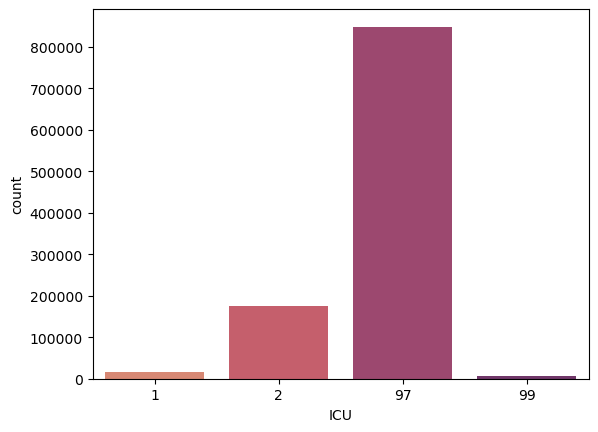

In [60]:
ax=sns.countplot(data=df,x='ICU',palette='flare')

Since there are too many missing values from the columns ICU and INTUBED, we will drop these columns.



In [61]:
df.drop(['ICU', 'INTUBED'], axis=1)

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,DEATH
0,2,1,1,1,03/05/2020,1,65,2,2,2,2,2,1,2,2,2,2,2,3,1
1,2,1,2,1,03/06/2020,1,72,2,2,2,2,2,1,2,2,1,1,2,5,1
2,2,1,2,2,09/06/2020,2,55,2,1,2,2,2,2,2,2,2,2,2,3,1
3,2,1,1,1,12/06/2020,2,53,2,2,2,2,2,2,2,2,2,2,2,7,1
4,2,1,2,1,21/06/2020,2,68,2,1,2,2,2,1,2,2,2,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,2,40,2,2,2,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,9999-99-99,2,51,2,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,2,55,2,2,2,2,2,2,2,2,2,2,2,7,2
1048573,2,13,2,1,9999-99-99,2,28,2,2,2,2,2,2,2,2,2,2,2,7,2


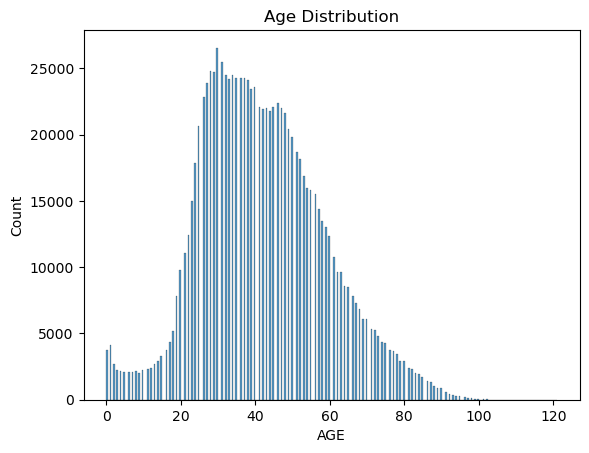

In [72]:
sns.histplot(x=df.AGE)
plt.title("Age Distribution");

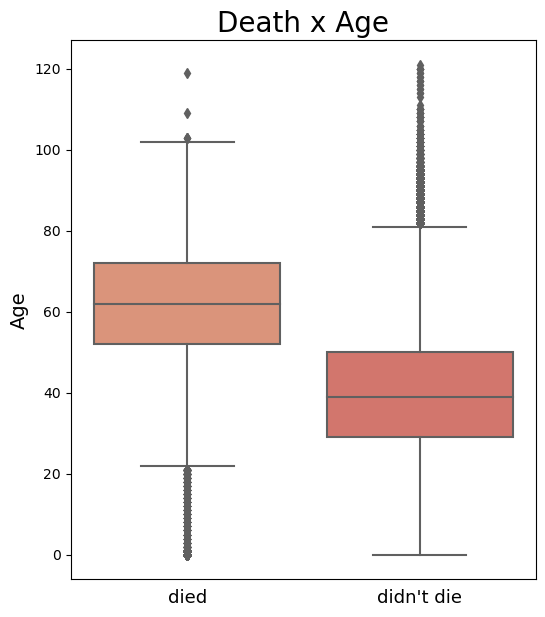

In [63]:
plt.figure(figsize=(6, 7))
sns.boxplot(data=df, x='DEATH', y='AGE', palette=sns.color_palette('flare'))
plt.title('Death x Age', fontsize=20)
plt.xlabel(None)
plt.ylabel('Age', fontsize=14)
plt.tick_params(bottom=False)
plt.xticks([0, 1], ['died', 'didn\'t die'], fontsize=13);

In the column CLASSIFICATION_FINAL values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
Replacing the values with 1 for covid patients and 2 for the rest.


In [64]:
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

In [65]:
df.CLASIFFICATION_FINAL.value_counts()

2    656596
1    391979
Name: CLASIFFICATION_FINAL, dtype: int64

Getting rid of the missing values of the other features. 

In [66]:
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

In [67]:
df.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,...,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU,DEATH
count,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,...,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06,1.025152e+06
mean,1.642105e+00,8.993643e+00,1.499376e+00,1.187191e+00,7.938837e+01,1.865777e+00,4.188778e+01,2.289673e+00,1.880588e+00,1.985977e+00,...,1.986745e+00,1.844338e+00,1.973535e+00,1.980368e+00,1.846890e+00,1.982099e+00,1.919353e+00,1.620663e+00,7.941951e+01,1.927119e+00
std,4.793813e-01,3.722439e+00,4.999999e-01,3.900648e-01,3.696536e+01,3.408919e-01,1.674833e+01,5.335415e+00,3.242723e-01,1.175868e-01,...,1.143632e-01,3.625346e-01,1.605147e-01,1.387329e-01,3.600937e-01,1.325909e-01,2.722917e-01,4.852223e-01,3.691951e+01,2.599410e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,2.000000e+00
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,2.000000e+00,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.700000e+01,2.000000e+00
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,2.000000e+00,1.210000e+02,9.800000e+01,2.000000e+00,2.000000e+00,...,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,9.900000e+01,2.000000e+00
